In [3]:
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img

import numpy as np
import cv2

import PIL.Image as Image
#import os

import matplotlib.pylab as plt

# import tensorflow as tf
#import tensorflow_hub as tensorflow_hub

from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential

import pathlib

In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range=[0.3,0.9],
        channel_shift_range=150.0,
        horizontal_flip=True,
        fill_mode='nearest')

In [5]:
confused_dataset_dir = "Student-engagement-dataset/Engaged/confused"
engaged_dataset_dir = "Student-engagement-dataset/Engaged/engaged"
frustrated_dataset_dir = "Student-engagement-dataset/Engaged/frustrated"

Lookingaway_dataset_dir = "Student-engagement-dataset/Not engaged/Looking Away"
bored_dataset_dir = "Student-engagement-dataset/Not engaged/bored"
drowsy_dataset_dir = "Student-engagement-dataset/Not engaged/drowsy"


confused_dataset_dir = pathlib.Path(confused_dataset_dir)
print(confused_dataset_dir)
engaged_dataset_dir = pathlib.Path(engaged_dataset_dir)
print(engaged_dataset_dir)
frustrated_dataset_dir = pathlib.Path(frustrated_dataset_dir)
print(frustrated_dataset_dir)
Lookingaway_dataset_dir = pathlib.Path(Lookingaway_dataset_dir)
print(Lookingaway_dataset_dir)
bored_dataset_dir = pathlib.Path(bored_dataset_dir)
print(bored_dataset_dir)
drowsy_dataset_dir = pathlib.Path(drowsy_dataset_dir)
print(drowsy_dataset_dir)

Student-engagement-dataset\Engaged\confused
Student-engagement-dataset\Engaged\engaged
Student-engagement-dataset\Engaged\frustrated
Student-engagement-dataset\Not engaged\Looking Away
Student-engagement-dataset\Not engaged\bored
Student-engagement-dataset\Not engaged\drowsy


In [6]:
list(confused_dataset_dir.glob('*'))[:5]

[WindowsPath('Student-engagement-dataset/Engaged/confused/0020.jpg'),
 WindowsPath('Student-engagement-dataset/Engaged/confused/0021.jpg'),
 WindowsPath('Student-engagement-dataset/Engaged/confused/0032.jpg'),
 WindowsPath('Student-engagement-dataset/Engaged/confused/0033.jpg'),
 WindowsPath('Student-engagement-dataset/Engaged/confused/0034.jpg')]

In [7]:
image_count = len(list(confused_dataset_dir.glob('*')))
image_count

369

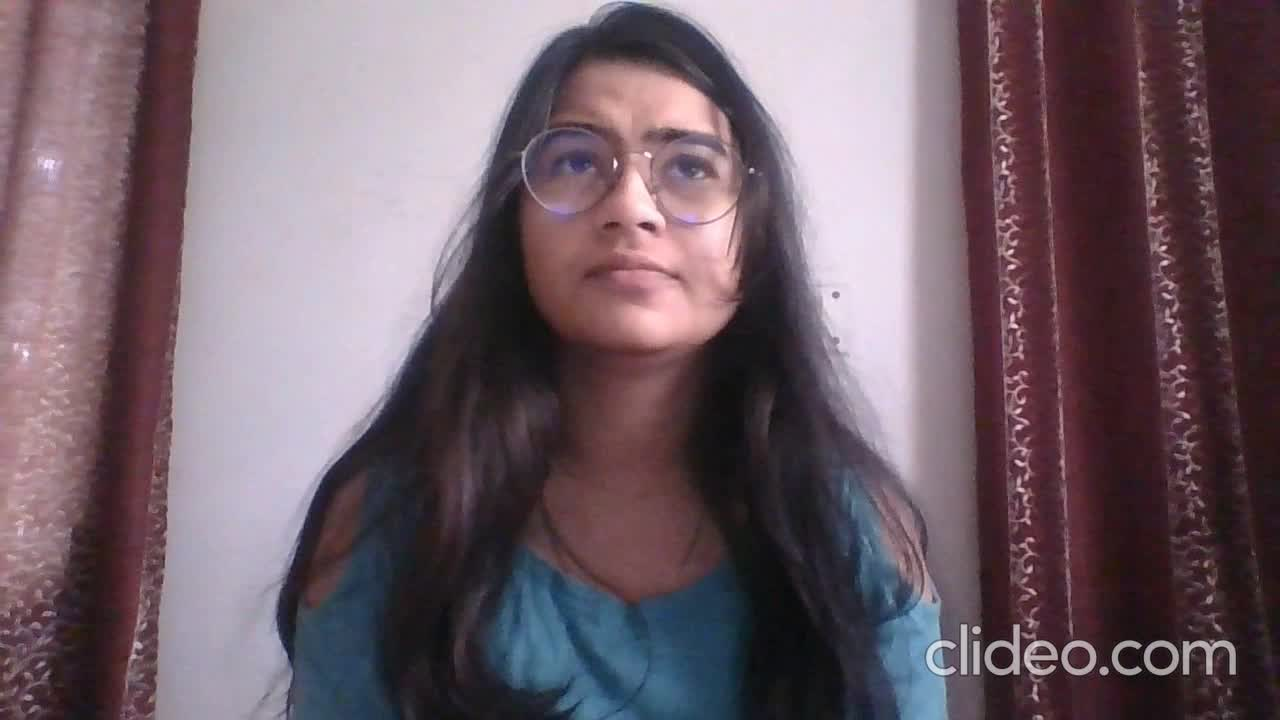

In [8]:
confused = list(confused_dataset_dir.glob("*"))
Image.open(str(confused[5])) 

In [9]:
path_dict = {
    'confused': 'Student-engagement-dataset/Engaged/confused',
    'engaged' : 'Student-engagement-dataset/Engaged/engaged',
    'frustrated': 'Student-engagement-dataset/Engaged/frustrated',
    'Lookingaway' : 'Student-engagement-dataset/Not engaged/Looking Away',
    'bored': 'Student-engagement-dataset/Not engaged/bored',
    'drowsy' : 'Student-engagement-dataset/Not engaged/drowsy',
}

In [10]:
image_dict = {
    'confused': list(confused_dataset_dir.glob('*')),
    'engaged' : list(engaged_dataset_dir.glob('*')),
    'frustrated': list(frustrated_dataset_dir.glob('*')),
    'Lookingaway' : list(Lookingaway_dataset_dir.glob('*')),
    'bored': list(bored_dataset_dir.glob('*')),
    'drowsy' : list(drowsy_dataset_dir.glob('*')),
}

In [11]:
for label, images in image_dict.items():
  for image in images:
    img = load_img(str(image))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=path_dict[label], save_prefix=label, save_format='jpg'):
        i += 1
        if i > 5:
            break